In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import seaborn as sns

In [2]:
house_df = pd.read_csv("../Dataset/housing.csv")
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
house_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='total_bedrooms', ylabel='Count'>

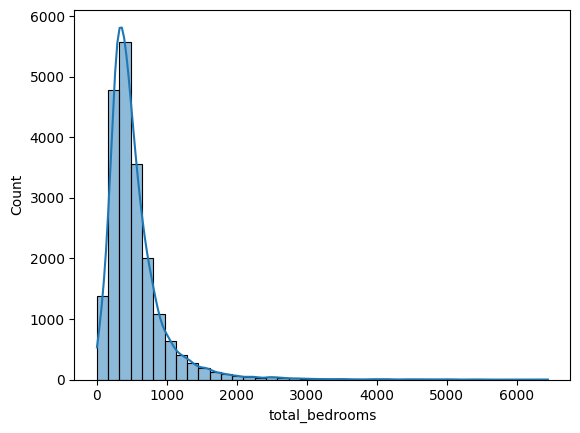

In [5]:
sns.histplot(house_df.total_bedrooms, bins=40, kde=True)

In [6]:
house_df["total_bedrooms"].fillna(house_df.total_bedrooms.median(), inplace=True)

In [7]:
house_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
house_df.drop(columns=["ocean_proximity"], inplace = True)

train , test = train_test_split(house_df, test_size=0.3)

In [9]:
samples = []
for sample_size in range(50,50*250, 50):
    train_x, _ = train_test_split(train, train_size=sample_size)
    samples.append(train_x)

In [10]:
def regSummary(y_true, y_pred, sample):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred)),
        "Sample Size": len(sample)
}

test_x = house_df.drop(columns=["median_house_value"])
test_y = house_df["median_house_value"]

In [11]:
test_error = []
train_error = []
for sample in samples:
    data_x = sample.drop(columns=["median_house_value"])
    data_y = sample["median_house_value"]

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(train_x, train_y)

    test_predict = reg.predict(test_x)
    train_predict = reg.predict(train_x)
    
    n1 = regSummary(test_y, test_predict, sample)
    n2 = regSummary(train_y, train_predict, sample)
    test_error.append(n1)
    train_error.append(n2)

    

In [12]:
test_error_df = pd.DataFrame(test_error)
train_error_df = pd.DataFrame(train_error)
# test_error_df.head(), train_error_df.head()

In [13]:
def plot_line(x,y, x_label, y_label, axes, label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

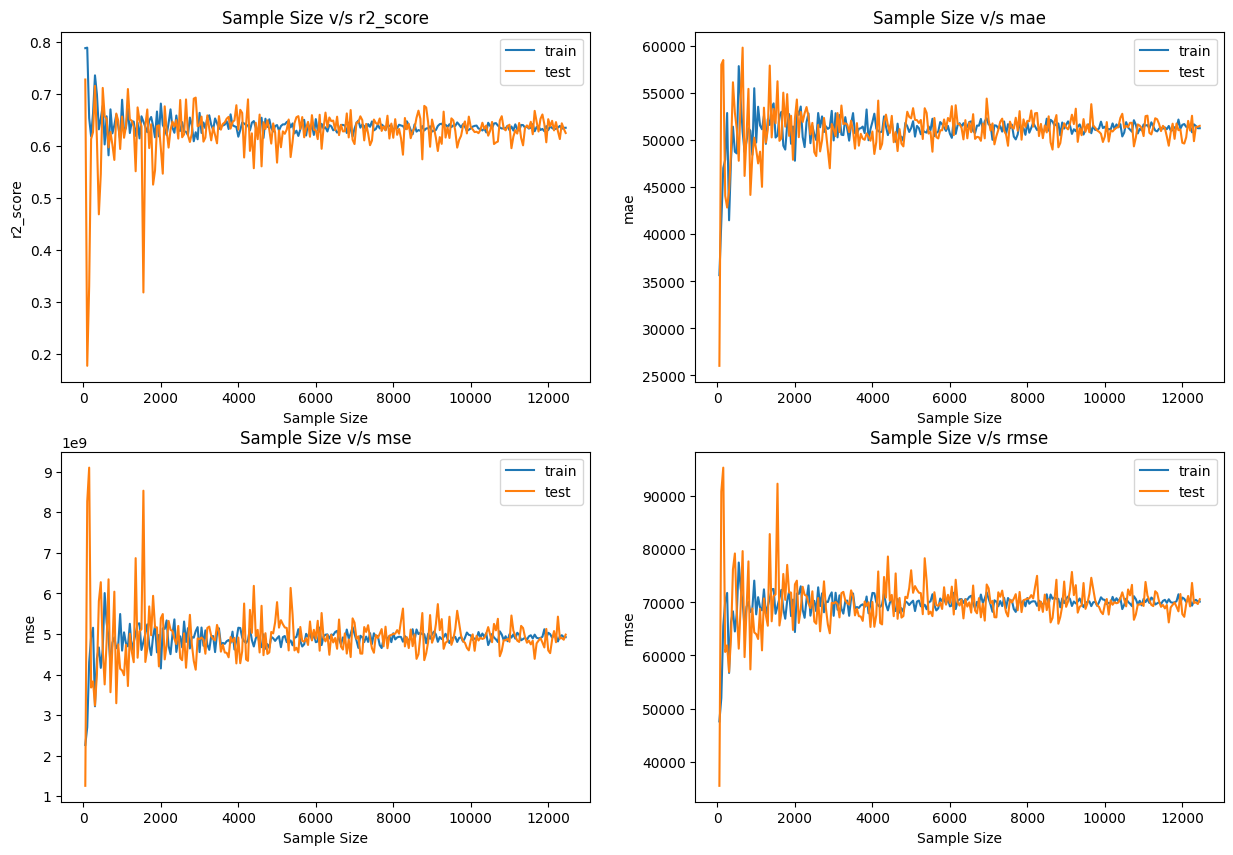

In [14]:
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
axes = axes.flatten()
column = train_error_df.columns

for ax, col in zip(axes, column):
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="test")

In [15]:
car_df = pd.read_csv("../Dataset/Carsales_dataset.csv")

car_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [16]:
car_df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

<Axes: xlabel='__year_resale_value', ylabel='Count'>

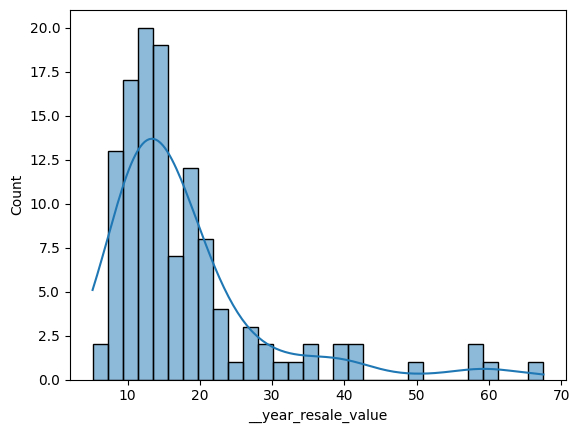

In [17]:
sns.histplot(car_df["__year_resale_value"], kde=True, bins=30)

In [18]:
car_df["__year_resale_value"].fillna(car_df["__year_resale_value"].median(), inplace=True)

In [19]:
car_df.drop(columns=["Manufacturer","Model", "Vehicle_type"], inplace=True)

In [20]:
car_df.drop(columns=["Latest_Launch"], inplace=True)

In [21]:
car_df.fillna(0, inplace=True)

In [22]:
car_df.isna().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [23]:
car_df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,17.180318,27.041828,3.041401,184.764331,106.802548,70.696815,186.150318,3.334994,17.837580,23.388535,76.062144
std,68.029422,10.178562,14.588537,1.069570,58.434177,11.471894,6.639513,20.070059,0.732713,4.131794,5.358494,26.441984
min,0.110000,5.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.114000,12.545000,17.885000,2.300000,148.000000,103.000000,68.400000,177.500000,2.958000,15.800000,21.000000,58.758249
50%,29.450000,14.180000,22.695000,3.000000,175.000000,107.000000,70.500000,187.800000,3.340000,17.200000,24.000000,71.838039
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [24]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")

StandardScaler()

In [25]:
car_scaled = scaler.fit_transform(car_df)

In [26]:
car_scaled.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.532042,-0.080851,-0.381091,-1.164369,-0.768516,-0.489934,-0.513243,-0.687308,-0.952926,-1.126005,0.863344,-0.674643
1,-0.200761,0.265588,0.093396,0.148757,0.690767,0.113460,-0.059957,0.337382,0.249196,-0.154804,0.301693,0.580804
2,-0.573406,0.102964,-1.859567,0.148757,0.690767,0.008522,-0.014628,0.292396,0.184845,-0.154804,0.488910,-2.885772
3,-0.654896,1.236405,1.028618,0.430141,0.433247,0.681876,0.106248,0.522326,0.705126,0.039436,-0.259957,0.581525
4,-0.480754,0.500161,-0.209863,-1.164369,-0.596835,-0.367507,-0.377257,-0.407393,-0.461398,-0.349044,0.676127,-0.504010


In [27]:
data_x = car_scaled.drop(columns=["Sales_in_thousands"])
data_y = car_scaled["Sales_in_thousands"]

In [28]:
reg = LinearRegression()

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3)

reg.fit(train_x, train_y)

LinearRegression()

In [29]:
def regSummary(y_true, y_pred):
    return{
        "r2_score": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "rmse": math.sqrt(mean_squared_error(y_true, y_pred))
    }

y_pred = reg.predict(test_x)

In [30]:
regSummary(test_y, y_pred)

{'r2_score': -2.1127971283566285,
 'mae': 0.7961812915408343,
 'mse': 1.924608353403734,
 'rmse': 1.3873025457353323}

In [31]:
car_df.shape

(157, 12)